In [1]:
#loading relevant packages
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset
penguins = sns.load_dataset("penguins")

In [3]:
#viewing dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
#clearly there are missing values
#going to drop values for the purposes of this case study
#also only going to choose two species in particular
#im familiar with this dataset already from my time R, so I know it is messy & complicated
#i just want to practice with a basic example for now
#going to keep Adelie & Gentoo penguins only for the purposes outlined above
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

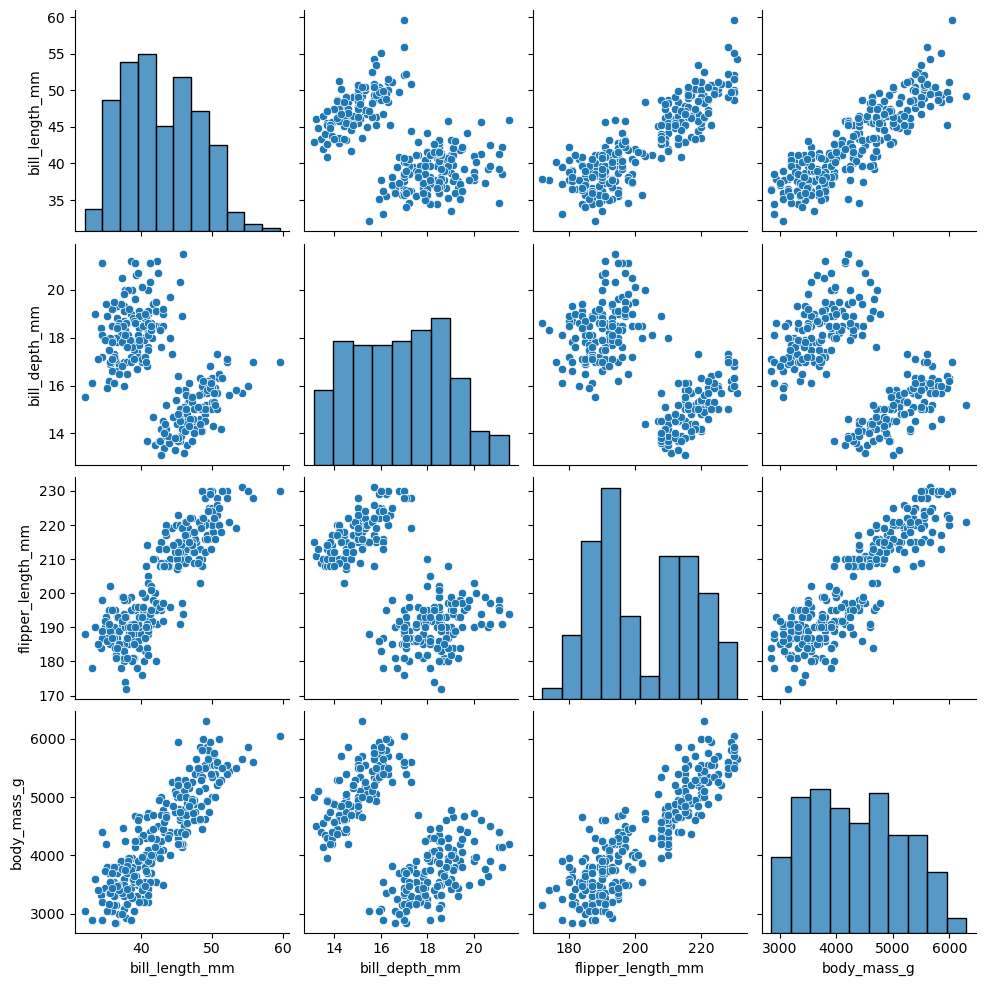

In [5]:
#conducting exploratory data analysis
#want to visualize a bunch of relationships at once to get a feel for the data
#dveloping pairwise scatterplot model
sns.pairplot(penguins_final)

In [6]:
#definitely see some linear relationships here
#bill length & flipper length
#bill length & body mass
#flipper length & body mass
#going to develop linear regression model now
#as aforementioned, i want to keep this case study simple because this is my first attempt at this in python
#going to explore relationship between bill length and body mass in particular 
#creating a subset for variables of interest
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [7]:
#writing out regression formula 
ols_formula = "body_mass_g ~ bill_length_mm"

In [8]:
#importing ols function 
from statsmodels.formula.api import ols

In [9]:
#building out OLS model & fitting it to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [10]:
#peeking at summary statistics from model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.33e-85
Time:                        03:48:17   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

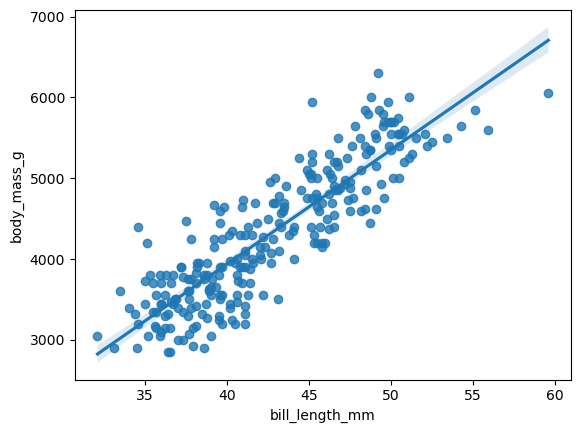

In [11]:
#R^2 at 77% is pretty good for simple linear regression
#lemme see the actual regression plot now
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

In [12]:
#looks pretty reasonable, seems line fits data well
#going to check for model assumptions now
#takes some setup the way i am envisioning things in my head now
#subsetting x variable 
X = ols_data["bill_length_mm"]

In [13]:
#getting predictions from model
fitted_values = model.predict(X)

In [14]:
#calculating residuals from model
residuals = model.resid

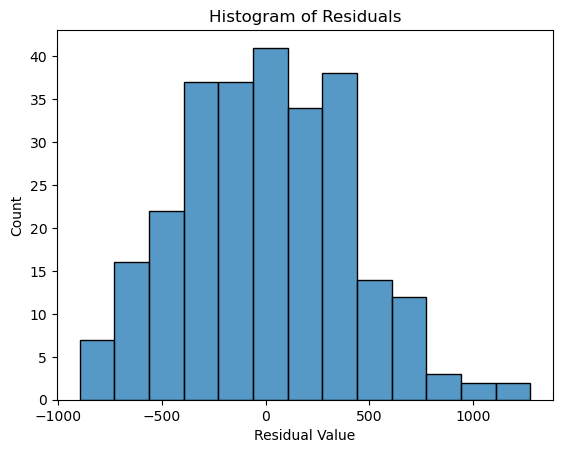

In [15]:
#checking normality assumption of OLS
#going to use histogram of residuals to inspect 
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

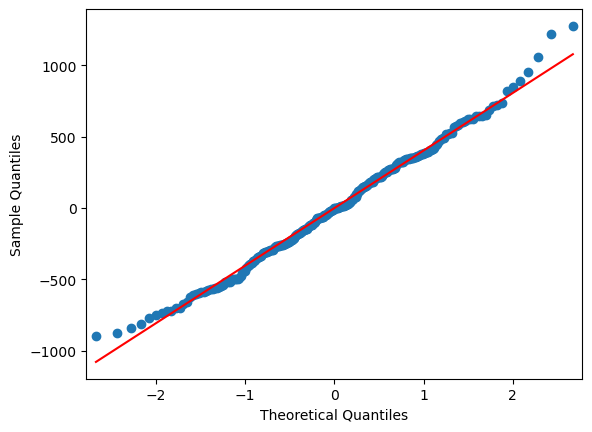

In [16]:
#seems to check out
#checking out normality assumption a different way for extra practice and future reference material
#going to try constructing a q-q plot 
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

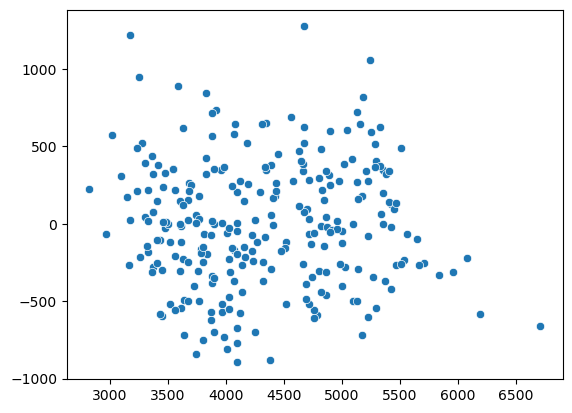

In [17]:
#in both cases, normality assumption checks out
#going to check homoscedasticity assumption next
#scatterplot of fitted values and residuals
#the visual should assume a random cloud form 
#importing relevant packages, forget if I did so earlier
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

In [18]:
#going to add a reference line now
fig.axhline(0)

In [19]:
#setting axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

Text(4.444444444444452, 0.5, 'Residuals')

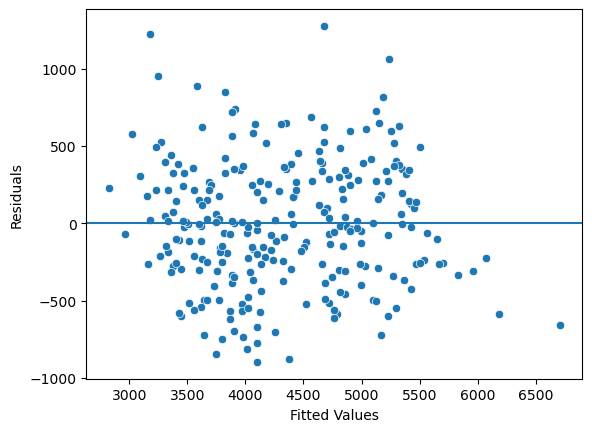

In [20]:
#okay now altogether, wanted to see if code was typed out correctly first 
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In [ ]:
#looks good, seems homoscedasticity assumption checks out too! 